In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from itertools import product
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# !pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA 
import os
from sklearn.cluster import DBSCAN
from itertools import product
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings("ignore")
from tqdm.notebook import tqdm
tqdm.pandas()




In [2]:
poke = pd.read_csv('https://raw.githubusercontent.com/DSS-ML/Unsupervised/main/Challenge/pokemon.csv')

# EDA and update

In [3]:
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #            917 non-null    int64  
 1   Legend       917 non-null    bool   
 2   Mega         917 non-null    bool   
 3   Name         917 non-null    object 
 4   Type 1       917 non-null    object 
 5   Type 2       917 non-null    object 
 6   Total        917 non-null    int64  
 7   HP           917 non-null    int64  
 8   Attack       917 non-null    int64  
 9   Defense      917 non-null    int64  
 10  Sp. Atk      917 non-null    int64  
 11  Sp. Def      917 non-null    int64  
 12  Speed        917 non-null    int64  
 13  Height (m)   917 non-null    float64
 14  Weight (Kg)  917 non-null    float64
 15  BMI          917 non-null    object 
 16  Generation   917 non-null    int64  
dtypes: bool(2), float64(2), int64(9), object(4)
memory usage: 109.4+ KB


In [4]:
# drop unuseful column
poke.drop(columns = [poke.columns[0],'Name'], axis=1,inplace=True)

In [5]:
#description of numeric columns
poke.describe(include='all')

,Legend,Mega,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Height (m),Weight (Kg),BMI,Generation
count,917,917,917,917,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917,917.000000
unique,2,2,18,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,478,NaN
top,False,False,Water,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3,NaN
freq,850,869,123,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
mean,NaN,NaN,NaN,NaN,438.146129,69.546347,80.056707,74.532170,73.199564,72.315158,68.496183,1.270611,69.252672,NaN,3.974918
std,NaN,NaN,NaN,NaN,120.350210,26.074785,32.586115,31.237579,33.179584,27.839761,29.439288,1.303521,124.888119,NaN,1.986973
min,NaN,NaN,NaN,NaN,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.100000,0.100000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,0.610000,9.500000,NaN,2.000000
50%,NaN,NaN,NaN,NaN,455.000000,66.000000,75.000000,70.000000,65.000000,70.000000,65.000000,0.990000,29.500000,NaN,4.000000
75%,NaN,NaN,NaN,NaN,517.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,1.500000,70.000000,NaN,6.000000


Generation, type1,type2 should be categorical
and BMI should be numeric... 

In [6]:
#convert it to category
poke['Generation'] = poke['Generation'].astype('category')
poke['Type 1'] = poke['Type 1'].astype('category')
poke['Type 2'] = poke['Type 2'].astype('category')

# BMI have some strange value "99,999.0", comma ruined everything so let's simply remove comma and also apply float
poke['BMI'] = poke['BMI'].progress_apply(lambda x: str(x).replace(',','')).astype(float)

  0%|          | 0/917 [00:00<?, ?it/s]

In [7]:
poke.describe(include='all')

,Legend,Mega,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Height (m),Weight (Kg),BMI,Generation
count,917,917,917,917,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.0
unique,2,2,18,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
top,False,False,Water,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
freq,850,869,123,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.0
mean,NaN,NaN,NaN,NaN,438.146129,69.546347,80.056707,74.532170,73.199564,72.315158,68.496183,1.270611,69.252672,148.240785,NaN
std,NaN,NaN,NaN,NaN,120.350210,26.074785,32.586115,31.237579,33.179584,27.839761,29.439288,1.303521,124.888119,3300.986809,NaN
min,NaN,NaN,NaN,NaN,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.100000,0.100000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,0.610000,9.500000,19.200000,NaN
50%,NaN,NaN,NaN,NaN,455.000000,66.000000,75.000000,70.000000,65.000000,70.000000,65.000000,0.990000,29.500000,28.600000,NaN
75%,NaN,NaN,NaN,NaN,517.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,1.500000,70.000000,41.300000,NaN


In [8]:
#co-occurence for type 1 e type 2
poke.groupby(['Type 1','Type 2']).count()['Total'].sort_values(ascending=False)[:30]

Type 1    Type 2  
Normal    None        66
Water     None        64
Psychic   None        41
Grass     None        38
Fire      None        30
Electric  None        29
Normal    Flying      27
Fighting  None        22
Bug       None        18
Fairy     None        16
Poison    None        16
Grass     Poison      15
Ground    None        15
Ice       None        14
Bug       Flying      14
Rock      None        13
Bug       Poison      12
Dragon    None        12
Dark      None        12
Ghost     Grass       11
Water     Ground      10
Ghost     None        10
Grass     Flying       7
Water     Flying       7
Fire      Fighting     7
Water     Dark         7
Psychic   Fairy        7
Bug       Steel        7
Steel     Psychic      7
Psychic   Flying       7
Name: Total, dtype: int64

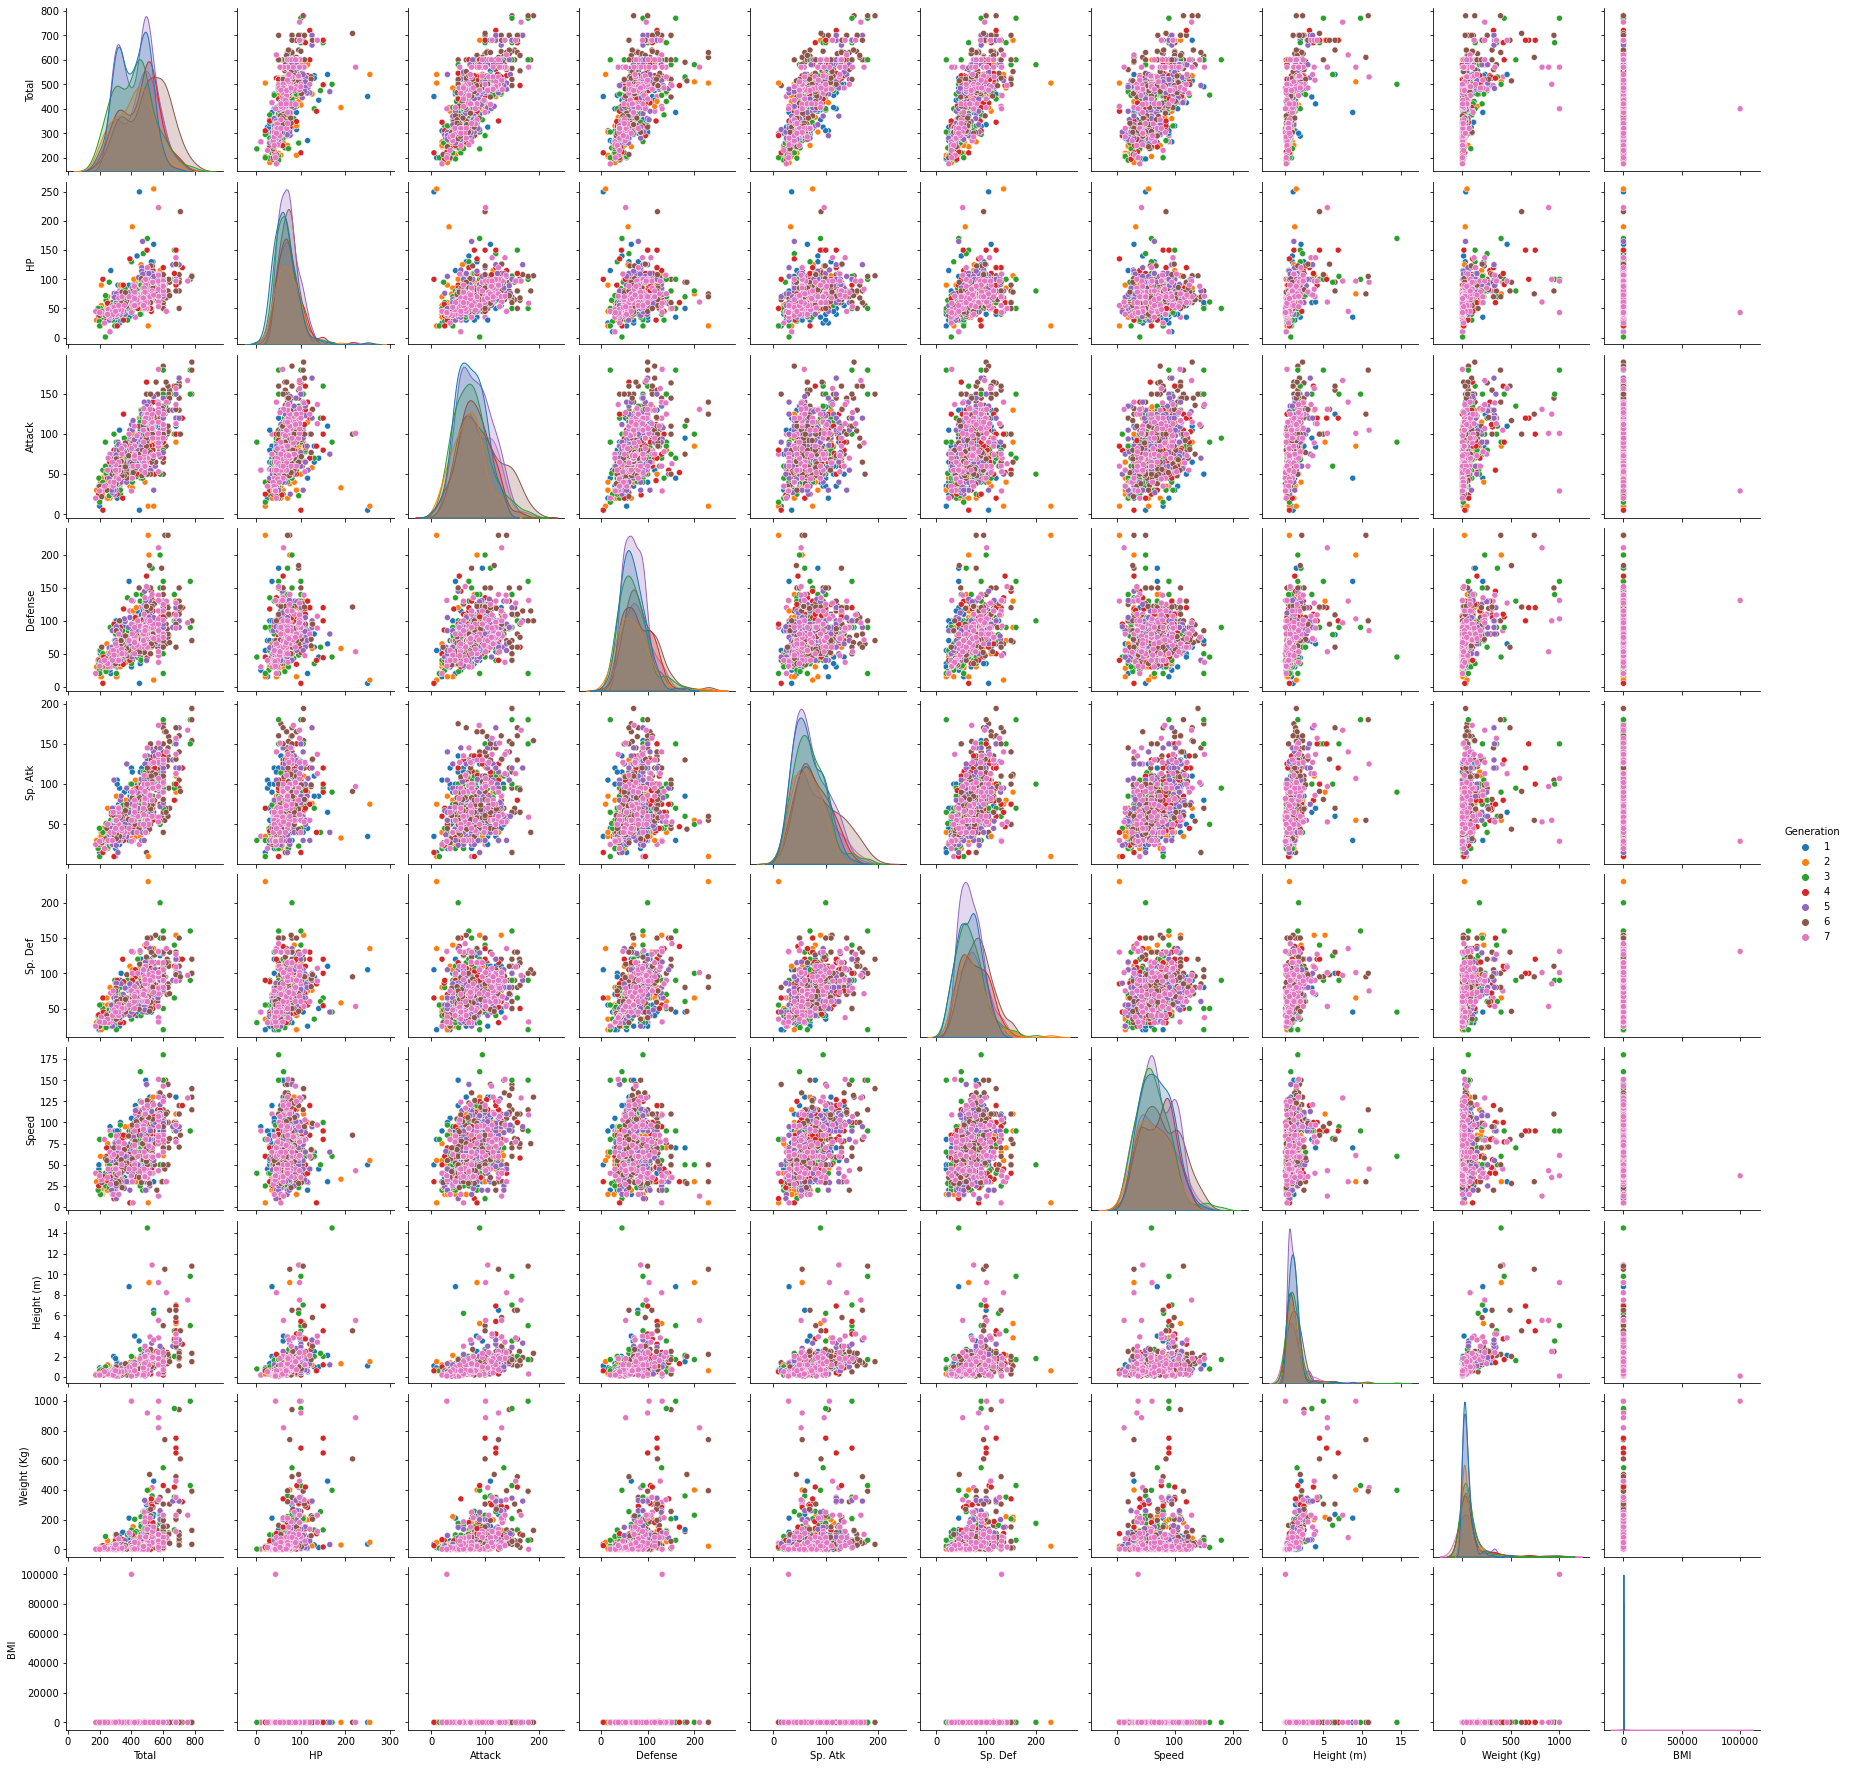

In [9]:
sns.pairplot(poke.iloc[:,2:], hue='Generation')

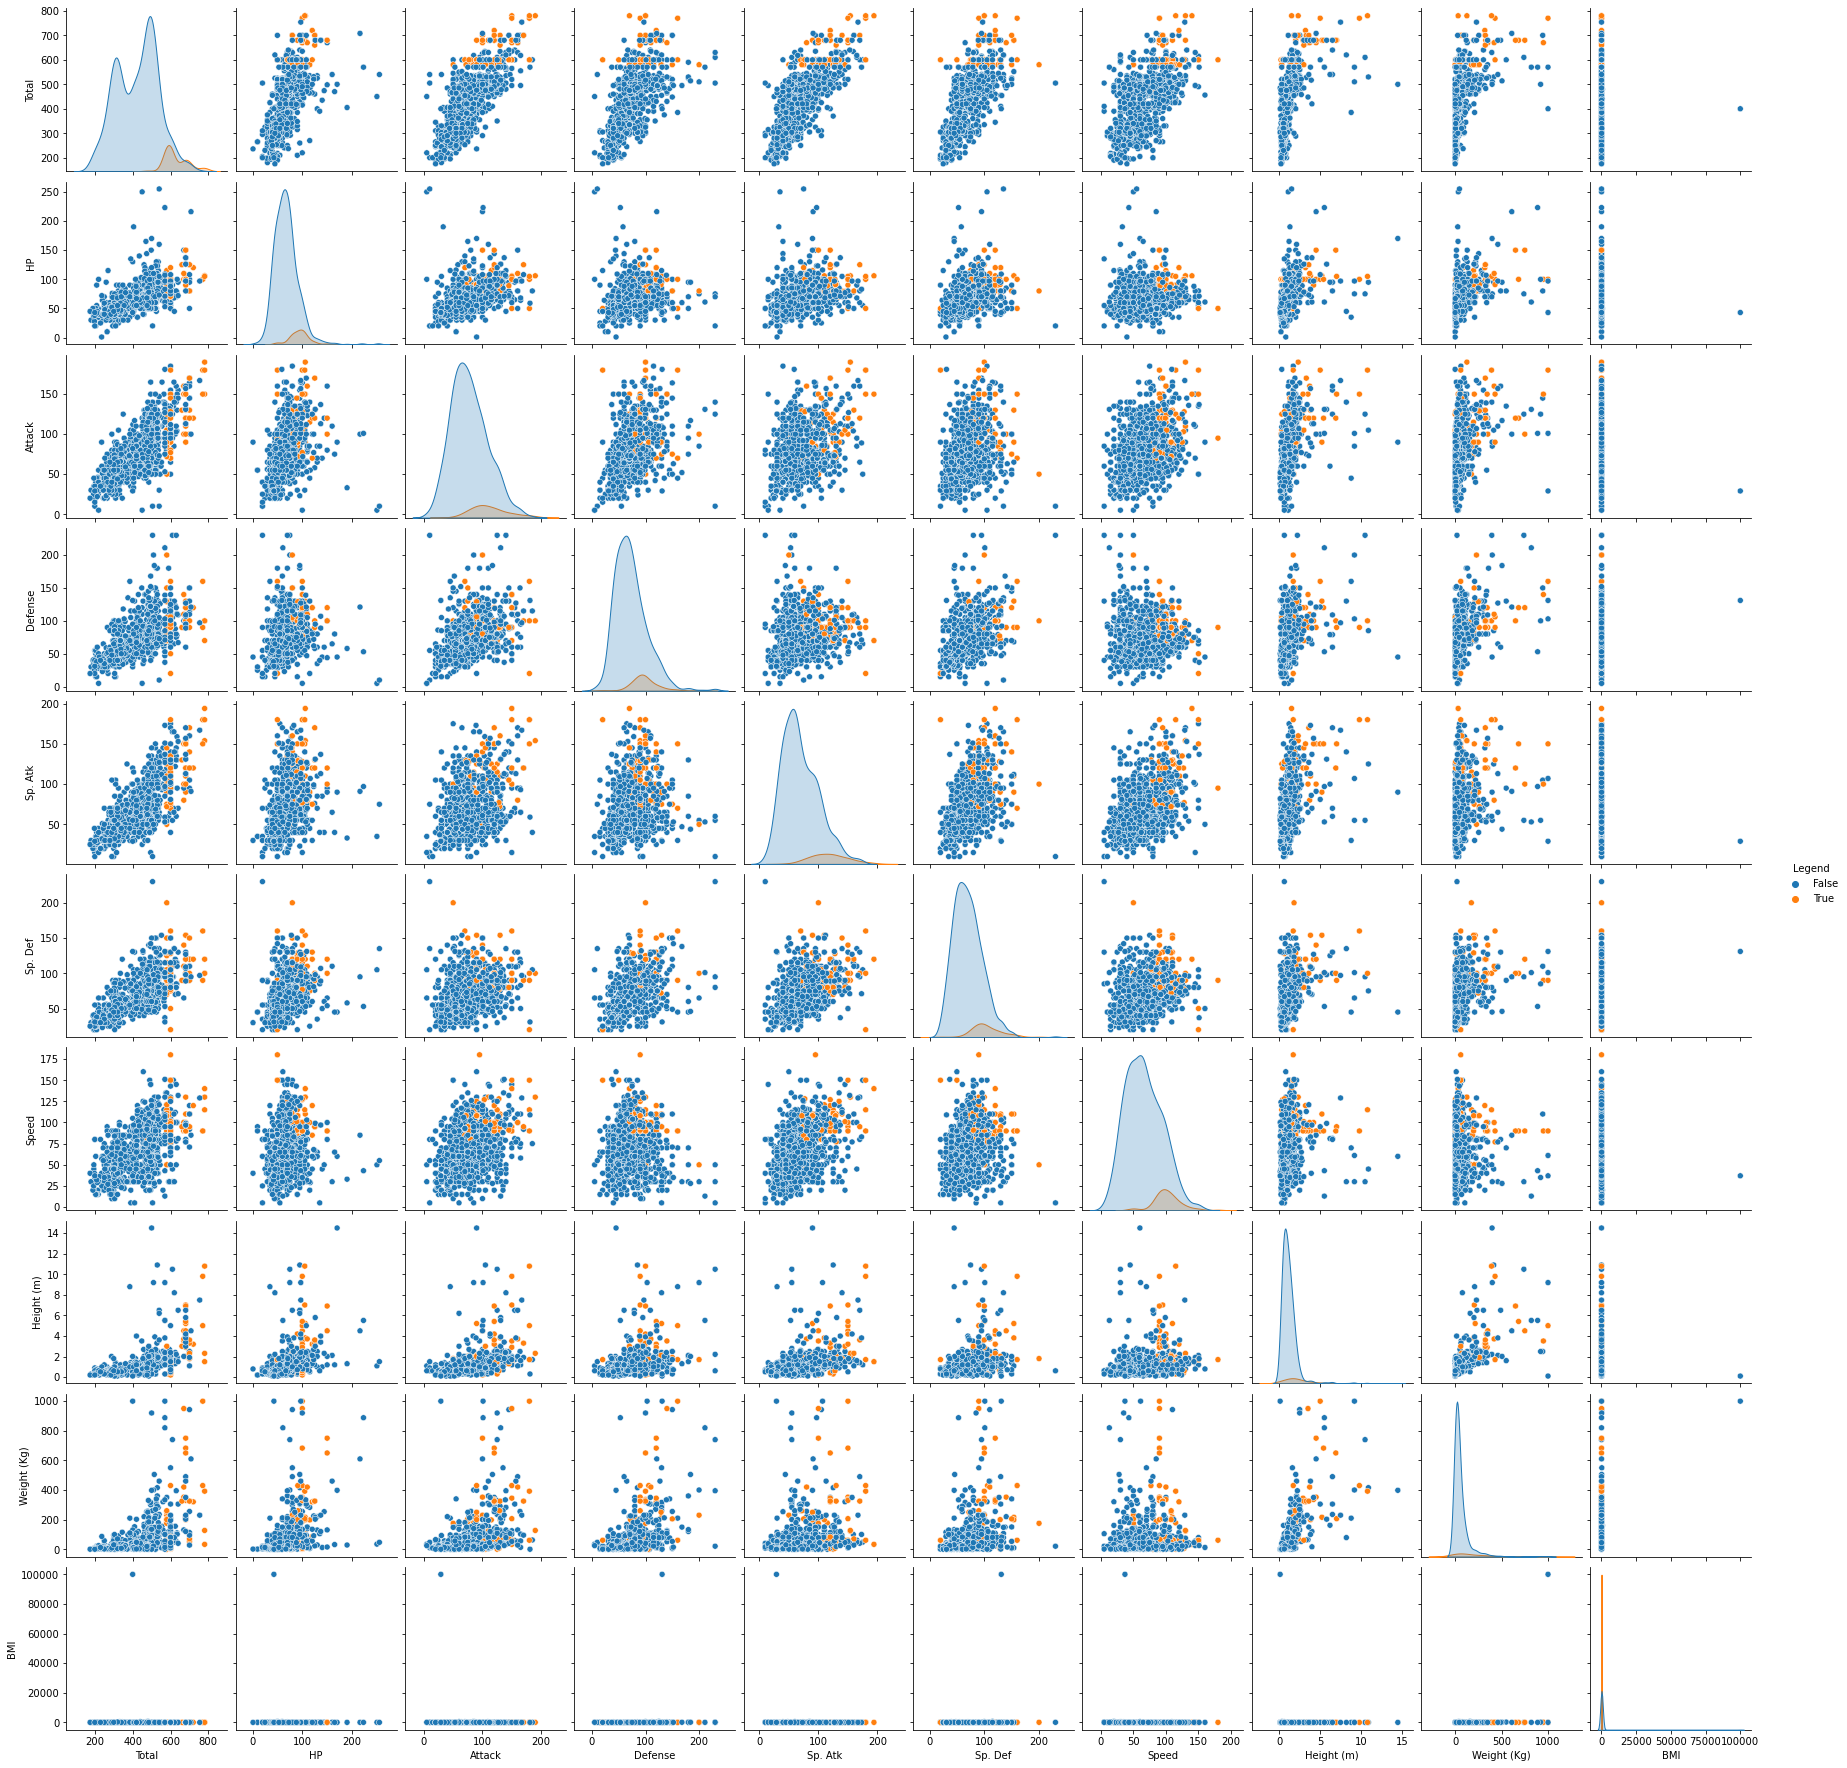

In [10]:
sns.pairplot(data=pd.concat([poke.iloc[:,2:],poke['Legend']], axis=1), hue='Legend')

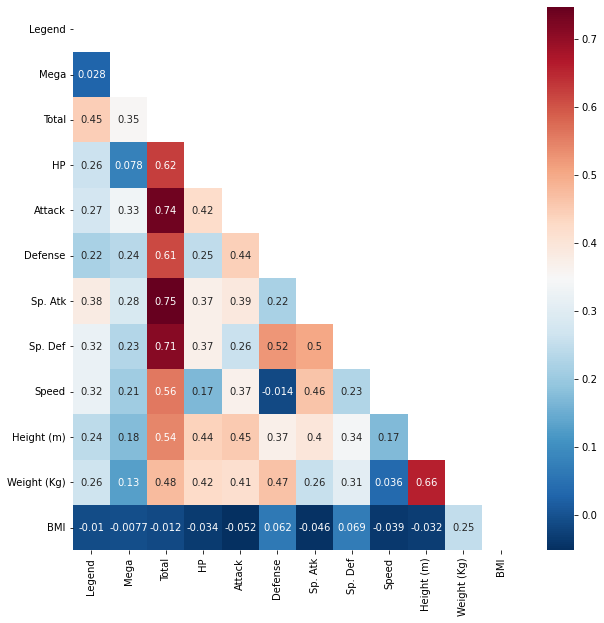

In [11]:
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(poke.corr()))
sns.heatmap(poke.corr(), annot=True, mask = mask, cmap ="RdBu_r");

Let's delete the observation with the highest value of BMI which makes a lot of bias

In [12]:
poke.drop(poke[poke['BMI'] == poke['BMI'].max()].index, axis = 0, inplace = True)
poke.reset_index(inplace = True, drop = True)

Clustering with exclueding Total which is a linear combination of all stats

In [13]:
X = poke[['HP', 'Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Height (m)', 'Weight (Kg)','BMI']]
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

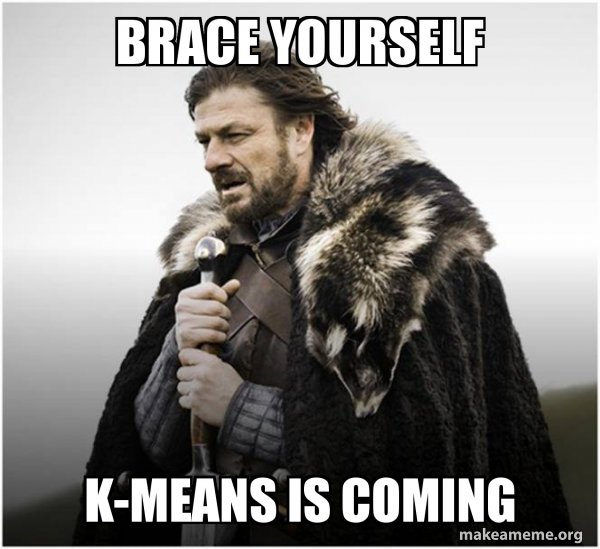

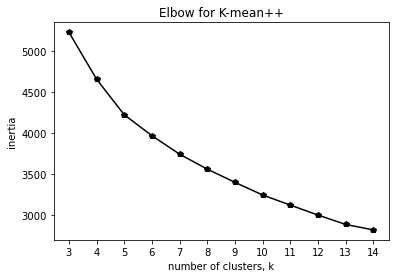

In [14]:
inertias = [] # our WSS
ks = range(3, 15)
# Creating 10 K-Mean++ models while varying the number of clusters (k)
for k in range(3,15):
    model = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
    # Fit model to samples
    model.fit(X)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
plt.plot(range(3,15), inertias, '-p', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title('Elbow for K-mean++')
plt.show()

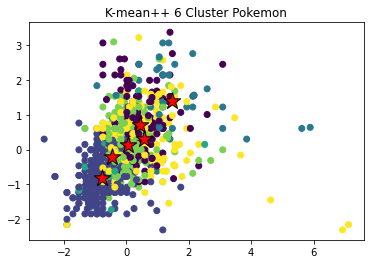

[[ 0.43839858  0.6986851 ]
 [-0.77117854 -0.81017259]
 [ 1.46487546  1.40086764]
 [-0.46336615 -0.20895667]
 [ 0.06167615  0.14110534]
 [ 0.56148564  0.30988141]]


In [15]:
model = KMeans(n_clusters=6, init = 'k-means++')
model.fit(X)
# coordinates of cluster center
centroids = model.cluster_centers_ 
# cluster label for each data point
labels = model.labels_ 
plt.scatter(pd.DataFrame(X)[0], pd.DataFrame(X)[1], c = labels)
plt.scatter( centroids[:, 0], centroids[:, 1], s=300, marker='*', c='red', edgecolor='black')
plt.title('K-mean++ 6 Cluster Pokemon')
plt.show()
print(centroids[:,0:2])



it doesn't look like there is an optimal number of cluster, tryin with 6 looks weird... but let's do an attempt with pca

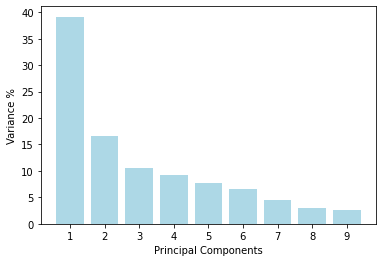

In [16]:
pca = PCA()
principalComponents = pca.fit_transform(X)
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_*100, color='lightblue')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)
# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

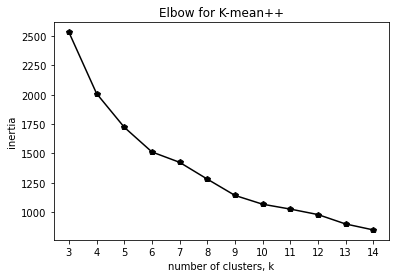

In [17]:
inertias = [] # our WSS
ks = range(3, 15)
# Creating 10 K-Mean++ models while varying the number of clusters (k)
for k in range(3,15):
    model = KMeans(n_clusters = k, init = 'k-means++', n_init = 1, random_state = 0)
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
plt.plot(range(3,15), inertias, '-p', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title('Elbow for K-mean++')
plt.show()

six seems the better one! so let's use it 

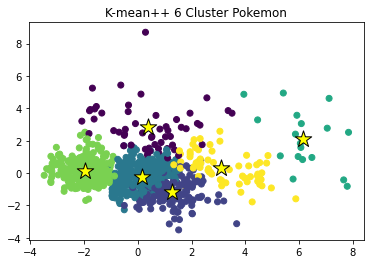

In [24]:
model = KMeans(n_clusters=6, init = 'k-means++')
model.fit(PCA_components.iloc[:,:3])
# coordinates of cluster center
centroids = model.cluster_centers_ 
# cluster label for each data point
labels = model.labels_ 
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.scatter( centroids[:, 0], centroids[:, 1], s=300, marker='*', c='yellow', edgecolor='black')
plt.title('K-mean++ 6 Cluster Pokemon')
plt.show()

In [25]:
poke['clusters'] = labels
poke.groupby(["clusters"]).agg({
    'Total': 'median', 
    'HP': 'median', 
    'BMI': 'median'})

,Total,HP,BMI
clusters,,,
0,483.0,60.0,112.20
1,565.0,75.0,21.00
2,465.0,73.5,27.30
3,675.0,100.0,18.45
4,305.0,48.0,31.70
5,600.0,100.0,30.70
